# Part I - (Ford GoBike System Data)
## by (Ziyad Almunyif)

## Introduction
> Ford GoBike system includes information about individual rides made in a bike-sharing system covering the San Francisco Bay area, it have multiple interesting columns as year of birth and the gender of the bike rider and the duration in seconds, the data was collected only in Feburary 2019.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from math import sin, cos, sqrt, atan2, radians
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [3]:
df.shape

(183412, 16)

In [4]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
55197,1080,2019-02-21 10:35:02.4910,2019-02-21 10:53:02.9900,52.0,McAllister St at Baker St,37.777416,-122.441838,321.0,5th St at Folsom,37.780146,-122.403071,1600,Customer,1980.0,Male,No
180511,736,2019-02-01 10:46:26.8590,2019-02-01 10:58:43.5550,254.0,Vine St at Shattuck Ave,37.880222,-122.269592,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,959,Subscriber,1992.0,Male,No
153345,136,2019-02-06 13:00:23.4730,2019-02-06 13:02:40.4590,104.0,4th St at 16th St,37.767045,-122.390833,116.0,Mississippi St at 17th St,37.764802,-122.394771,4706,Subscriber,1985.0,Male,No
20906,700,2019-02-26 10:02:01.7800,2019-02-26 10:13:41.8470,89.0,Division St at Potrero Ave,37.769218,-122.407646,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,4742,Customer,1982.0,Male,No
96279,440,2019-02-15 10:54:29.3630,2019-02-15 11:01:49.4880,58.0,Market St at 10th St,37.776619,-122.417385,121.0,Mission Playground,37.759210,-122.421339,4804,Subscriber,1978.0,Male,No
172912,1778,2019-02-03 13:56:47.2310,2019-02-03 14:26:25.7890,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,5547,Subscriber,1984.0,Male,No
68849,155,2019-02-19 21:02:39.0670,2019-02-19 21:05:14.6130,112.0,Harrison St at 17th St,37.763847,-122.413004,99.0,Folsom St at 15th St,37.767037,-122.415443,6165,Subscriber,1991.0,Female,No
16209,259,2019-02-27 08:46:56.6370,2019-02-27 08:51:16.3560,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,5469,Subscriber,1980.0,Female,No
181462,523,2019-02-01 09:09:40.9900,2019-02-01 09:18:24.9790,81.0,Berry St at 4th St,37.775880,-122.393170,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2134,Subscriber,1981.0,Male,No
149004,930,2019-02-06 20:04:21.3100,2019-02-06 20:19:51.9060,88.0,11th St at Bryant St,37.770030,-122.411726,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,1468,Subscriber,1987.0,Female,No


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Before going to the Exploration, I want to make some changes to dataset

### First I want duration colum to be in Minutes

In [6]:
df['duration_sec'] = df['duration_sec']/60
df.rename(columns = {'duration_sec':'duration_minute'}, inplace = True)

In [7]:
df['duration_minute'] = df['duration_minute'].astype(int)

In [8]:
df.head(10)

,duration_minute,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,869,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,708,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,1030,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,608,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,26,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,29,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,19,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,26,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,26,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,17,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


## Second I want to caluclate the Distance in Kilometers 

In [9]:
def CalculateDistance(la1,lo1,la2,lo2):
    
    # Approximate radius of earth in km
    R = 6373.0

    lat1 = radians(la1)
    lon1 = radians(lo1)
    lat2 = radians(la2)
    lon2 = radians(lo2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return(R * c)
    
    #from https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

In [10]:
Distance = []
for x in range(len(df['start_time'])):
    tempDistance = CalculateDistance(df['start_station_latitude'][x],df['start_station_longitude'][x],df['end_station_latitude'][x],df['end_station_longitude'][x])
    Distance.append(tempDistance)

In [11]:
df['distance_KM'] = np.array(Distance)

In [12]:
df.head(5)

,duration_minute,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_KM
0,869,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544879
1,708,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1.743546
2,1030,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.705394
3,608,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260820
4,26,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.410058


### start_station_latitude , start_station_longitude , end_station_latitude , end_station_longitude is not needed


In [13]:
df.drop(['start_station_latitude' , 'start_station_longitude' , 'end_station_latitude' , 'end_station_longitude'],axis=1,inplace=True)

In [14]:
df.head(5)

,duration_minute,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_KM
0,869,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,0.544879
1,708,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,1.743546
2,1030,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2.705394
3,608,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,0.260820
4,26,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2.410058


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 13 columns):
duration_minute            183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
distance_KM                183412 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 18.2+ MB


### member_birth_year change data type to int

In [16]:
df['member_birth_year'] = df['member_birth_year'].fillna(0)
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 13 columns):
duration_minute            183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          183412 non-null int64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
distance_KM                183412 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 18.2+ MB


I will make Age coulmns to be more clear the birth of year, since the dataset was recorded in 2019 i will subtract the year coulns witn 2019 to get the age

In [18]:
df['Age'] = 2019 - df['member_birth_year'] 

### What is the structure of your dataset?

The dataset that I choose have 13 columns with (3) float columns and (7) string and (3) integer, with 183412 rows, it have categorical nominal data like gender and user_type, there is quantitative continuous data like duration


### What is/are the main feature(s) of interest in your dataset?

duration_sec and member_birth_year for me is the main interest here, I have a lot of interesting question about it, and i want to know is the age really matter here or no 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think user_type will have strong relationship here because anyone subscribed should have more second than customer.


## Univariate Exploration




## Question: What is the frequency of Null values in the dataset?

### Visualization

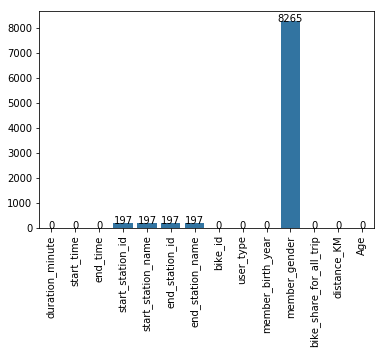

In [19]:
na_counts = df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts,color = base_color)
plt.xticks(rotation=90) 
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+300, count, ha = 'center', va='top')

### Observation:  We have a lot of null values in the  Member_gender and the rest have low to none null values, we need to drop them

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()

duration_minute            0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
distance_KM                0
Age                        0
dtype: int64

## Question: What the proportion of rike rider gender?

### Visualization

Text(0.5,1,'Bike rider gender')

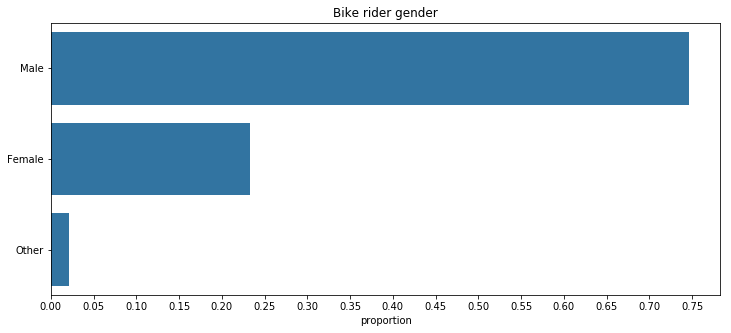

In [22]:
fig, ax = plt.subplots(figsize=(12, 5))
type_counts = df['member_gender'].value_counts()
type_order = type_counts.index
All = df['member_gender'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / All
base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_prop+0.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
sb.countplot(data = df, y = 'member_gender', color = base_color, order = type_order);
plt.xticks(tick_props * All, tick_names)
plt.xlabel('proportion')
plt.ylabel('')
plt.title('Bike rider gender')

### Observation: Male bike rider is double and half of female bike rider, Male is nearly 75% and female nearly 25%

## Question: What is the perecntage of Age above 40?

In [23]:
df['member_birth_year'].min(),df['member_birth_year'].max()

(1878, 2001)

In [24]:
def pie(label,size,title,color):
    labels = label 
    sizes = size 
    explode = (0, 0.1) 
    colors = color
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, explode=explode,shadow=True, autopct='%1.1f%%', startangle=90,colors=colors)
    ax1.axis('equal')
    plt.title(title)
    plt.show()

### Visualization

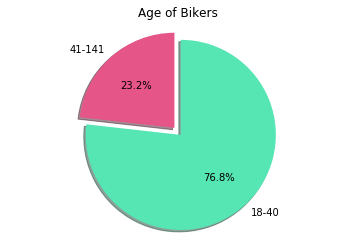

In [25]:
Above40 = df.query('Age >= 40')
below40 = df.query('Age < 40')
label = '41-141','18-40'
size = [Above40.count()[0],below40.count()[0]]
titlee = 'Age of Bikers'
colors = ['#e65587','#55e6b4']
pie(label,size,titlee,colors)

### Observation: 76.8% is below 41 and 23.2% is above 40

## Question: What is the perecntage of Bike sharing for all trip?

### Visualization

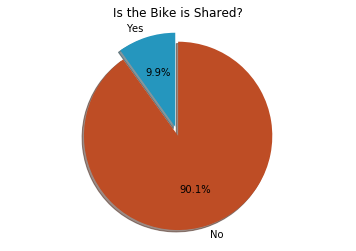

In [26]:
Yes = df.query('bike_share_for_all_trip == "Yes"')
No = df.query('bike_share_for_all_trip == "No"')
label = 'Yes','No'
size = [Yes.count()[0],No.count()[0]]
titlee = 'Is the Bike is Shared?'
colors = ['#2596be','#be4d25']
pie(label,size,titlee,colors)

### Observation: 90.1% is Yes and  9.9% is No!

## Question: What is the frequency of duration?

In [27]:
df['duration_minute'].max(),df['duration_minute'].min()

(1409, 1)

### Visuallation

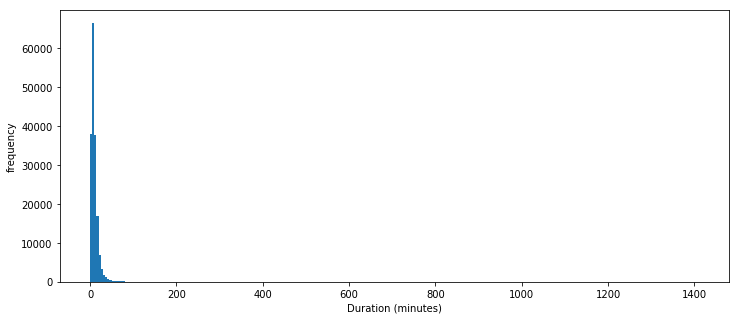

In [28]:
binsize = 5
bins = np.arange(0, df['duration_minute'].max()+binsize,binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = df['duration_minute'], bins = bins)
plt.xlabel('Duration (minutes)')
plt.ylabel('frequency')
plt.show()

#### It seems there is problems, lets investigate

In [29]:
df.query('distance_KM == 0')['duration_minute'].count()

3458

#### Some the values have a  distance equals 0, So there is a problem need to be fix, lets fix it

In [30]:
df = df[df.distance_KM != 0]

In [31]:
df.query("distance_KM == 0")

,duration_minute,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_KM,Age


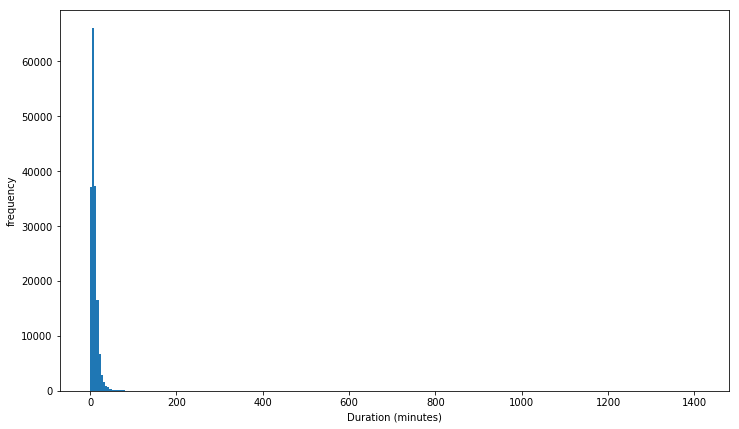

In [32]:
binsize = 5
bins = np.arange(0, df['duration_minute'].max()+binsize,binsize)

plt.figure(figsize=[12, 7])
plt.hist(data = df, x = df['duration_minute'], bins = bins)
plt.xlabel('Duration (minutes)')
plt.ylabel('frequency')
plt.show()

### Still the problem occurs, in this case i'm gonna use x-axis limit (xlim) to get better look 

Text(0,0.5,'frequency')

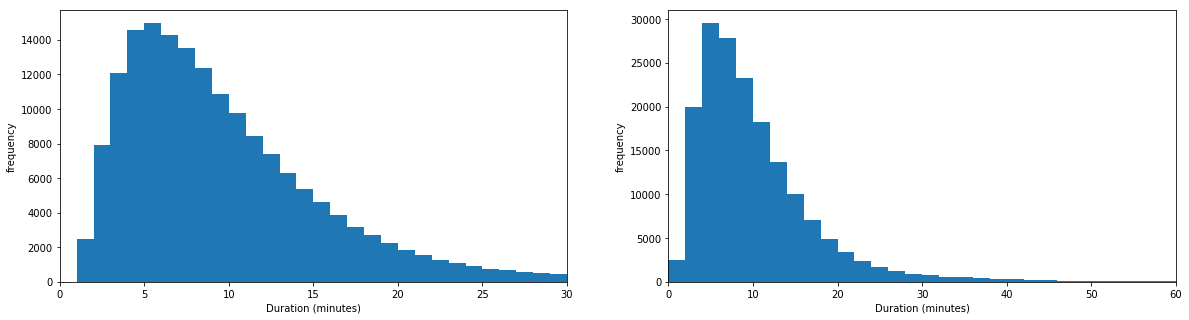

In [33]:
# Define the figure size
plt.figure(figsize = [20, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
binsize = 1
bins = np.arange(0, df['duration_minute'].max()+binsize,binsize)
plt.hist(data = df, x = df['duration_minute'], bins = bins)
plt.xlabel('Duration (minutes)')
plt.ylabel('frequency')
plt.xlim(0, 30)
# histogram on right: focus in on bulk of data < 6
plt.subplot(1, 2, 2)
binsize = 2
bins = np.arange(0, df['duration_minute'].max()+binsize,binsize)
plt.hist(data = df, x = df['duration_minute'], bins = bins)
plt.xlim(0, 60) # could also be called as plt.xlim((0, 6))
plt.xlabel('Duration (minutes)')
plt.ylabel('frequency')

### it's good, but I want to try the logarithmic transform to the data

In [34]:
np.log10(df['duration_minute'].describe())

count    5.234249
mean     1.036471
std      1.407788
min      0.000000
25%      0.698970
50%      0.903090
75%      1.079181
max      3.148911
Name: duration_minute, dtype: float64

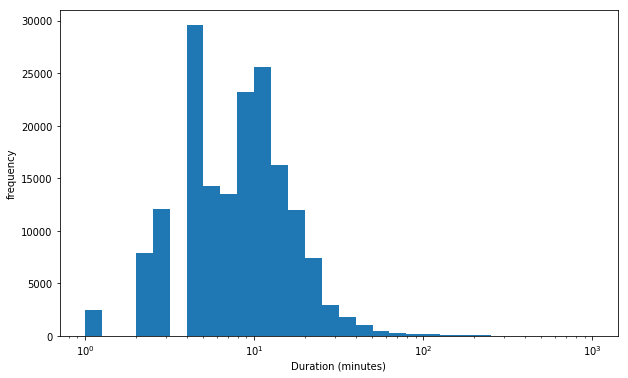

In [35]:
binsize = 0.1
bins = 10 ** np.arange(0, 3+binsize,binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df, x = df['duration_minute'], bins = bins)
plt.xlabel('Duration (minutes)')
plt.ylabel('frequency')
plt.xscale('log')
plt.show()

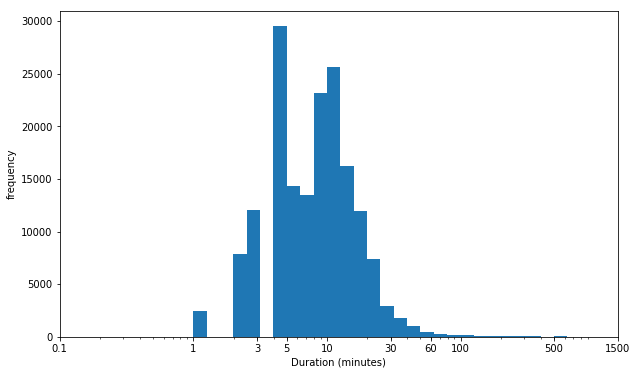

In [36]:
ticks = [0.1,1,3,5,10,30,60,100,500,1500]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
binsize = 0.1
bins = 10 ** np.arange(0, 3+binsize,binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df, x = df['duration_minute'], bins = bins)
plt.xlabel('Duration (minutes)')
plt.ylabel('frequency')
plt.xscale('log')
plt.xticks(ticks, labels);
plt.show()

### Thats much better

## Observation:

Duration Colum have a lot of outliers, so I have to try other techqniues to make the graph have meaning, the x limit to 30 is the best one it's shows that the Distance pepole take Mostly around 5 Minutes

## Question: What is the perecntage of Subscribe User type?

### Visualization

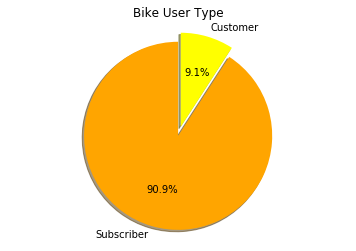

In [37]:
#df.member_birth_year.value_counts()
df.user_type.max(),df.user_type.min()

#sb.barplot(df.member_birth_year.index.values, na_counts)
label = 'Subscriber','Customer'
size = [df.query('user_type == "Subscriber"')['user_type'].count(),df.query('user_type == "Customer"')['user_type'].count()]
titlee = 'Bike User Type'
colors = ['orange','yellow']
pie(label,size,titlee,colors)


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In the Duration column there was a lot of outliners, I did have to do some transformations like logarithmic transform and using x-axis limit, the rest of the columns The distrbution was normal and there was no unsuasl points, and i didn't need to do any tranforamtions.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The duration column was in Seconds and I did make to minute because the minmum duration in sec and the maximum duration in sec have huge difference between them so I want to make little more narrow, and I just droped the null values so i can get accurate result, and changed some datatypes as year of birth to int.

## Bivariate Exploration


In [38]:
df.head(5)

,duration_minute,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_KM,Age
0,869,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,0.544879,35
2,1030,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,2.705394,47
3,608,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,0.260820,30
4,26,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,2.410058,45
5,29,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,3.333249,60


In [39]:
df[['Age','duration_minute']].describe()

,Age,duration_minute
count,171494.000000,171494.000000
mean,34.195278,10.876054
std,10.084265,25.573355
min,18.000000,1.000000
25%,27.000000,5.000000
50%,32.000000,8.000000
75%,39.000000,12.000000
max,141.000000,1409.000000


## Question: Is there any relation between Gender and Bike Share for all trip?

### Visualization

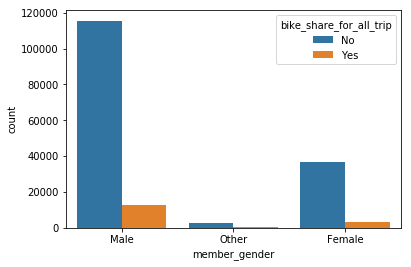

In [40]:
sb.countplot(data = df, x = 'member_gender', hue = 'bike_share_for_all_trip');

### Observation: Most of the time there is no sharing, but there is few for male and female.

## Question: Is there any relation between Age and Duration?

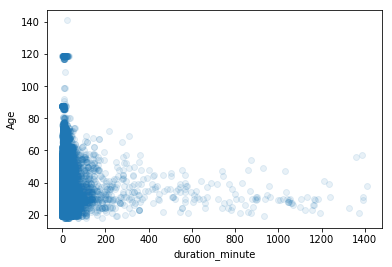

In [41]:
sb.regplot(data = df, y = 'Age', x = 'duration_minute', x_jitter=0.2, fit_reg = False ,scatter_kws={'alpha':1/10});

#### hmmm, I think heatmap will work better lets try

### Visualization

Text(0,0.5,'Age')

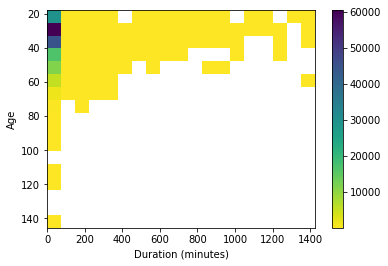

In [42]:
bins_y = np.arange(18,7.5+141,7.5)
bins_x = np.arange(1,1409+75,75)
bins = [bins_x,bins_y]
plt.hist2d(data = df, y = 'Age', x = 'duration_minute', cmin=0.1 ,  cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Duration (minutes)')
plt.ylabel('Age')

### Observation: Younger the age the more minutes the user ride for.

## Question: Is there any relation between Gender and User Type?

### Visualization

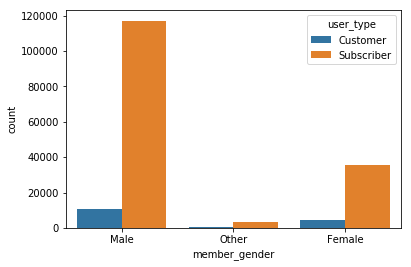

In [43]:
sb.countplot(data = df, x = 'member_gender', hue = 'user_type');

### Observation: Male Subscirbe more than the rest, And there is huge diffrence between Subscribe male and Customer Male

## Question: Is there any relation between Distance and User Type?

### Visualization

Text(0,0.5,'Avg. distance (KM)')

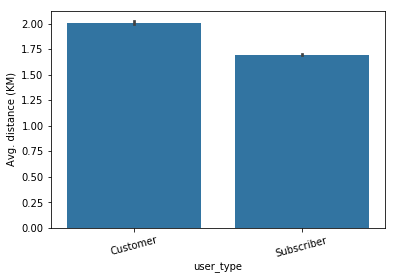

In [44]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'user_type', y = 'distance_KM', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. distance (KM)')

### Observation: Customers ride for a longer distance than Subscribers

## Question: Is there any relation between Bike share for all trip and User Type?

### Visualization

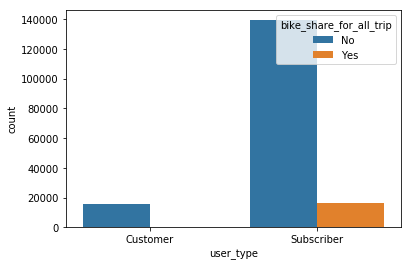

In [45]:
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip');

### Observation: There is no customer was sharing the bike, but there is few Subscriber that did

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 I was suprised about the Male Subscribe count compare to the rest,  the columns of intereset was given an interesting result when ploting them with each other

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 my main foucs was on the main features of intereset, I tried some of them but they didn't show any relations.

## Multivariate Exploration



## Question: Is there any relation between Age and User Type and Gender?

### Visualization

Text(0,0.5,'Avg. Age')

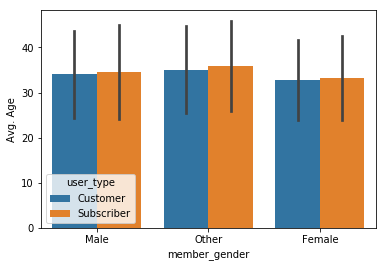

In [46]:
sb.barplot(data = df, x = 'member_gender', y= 'Age' , hue = 'user_type', ci = 'sd')
plt.ylabel('Avg. Age')

### Observation: the Avg Age in all are almost the same for Subscribers and Customer

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The relationship between Age and Distance showed that when the bike rider is younger that means it will ride for longer distance.
the relationship between Customer and Subscriber, Customer surprisingly ride for longer distance than Subscribers

### Were there any interesting or surprising interactions between features?

The relationship between Customer and Subscriber, Customer surprisingly ride for longer distance than Subscribers

## Conclusions
After investgating in ford GoBike system there is interesting information i gained, Male is more likely to subscirbe to bike system, the avereage duration rider will take between 5-12 minutes, older people (below 1989) likes bikes more than younger generation (1990 and above) 
